#1) Introdução


Autoria: Jackson Corrêa

Linkedin: https://www.linkedin.com/in/jackson-corr%C3%AAa/
<br><br>
Este é um projeto de Ciência de Dados que tem como objetivo principal desenvolver um modelo de máquina preditiva de valores de seguros, dadas algumas informações sobre o indivíduo.

O objetivo secundário deste projeto é verificar o desempenho dos algoritmos, em especial aqueles baseados em árvores, frente à dados codificados pelos métodos CatBoostEncoder e OneHotEncoder. Dessa forma, a etapa de análise exploratória não possui volume relevante de insights.
<br>
<br>
O projeto consiste em duas macro-etapas:

* Análise exploratória dos dados, mais simples e com menos insights;
* Pré processamento dos dados com split em dados de treino e teste, codificação de variáveis categóricas utilizando CatBoostEncoder e OneHotEncoder, além da padronização e normalizção dos dados;
* Modelagem de máquinas preditivas, com análise de desempenho do modelo testado com validação cruzada, seleção do modelo mais promissr e tunagem de hiperparâmetros para treinamento e teste de um modelo final.
<br><br>

Foram escolhidos os seguintes algoritmos para a modelagem da máquina preditiva:
* Regressão Linear
* Random Forest
* XGBoost
<br><br>

As métricas principais para avaliação do desempenho dos modelos são o RMSE (raiz do erro médio quadrático) e o Coeficiente de Determinação (R2)
<br><br>


##1.1) Fonte de dados

Os dados utilizados neste projeto estão armazenadas em um dataset extraído da plataforma kaggle.

Link de acesso: https://www.kaggle.com/datasets/mirichoi0218/insurance
<br><br>

##1.2) Dicionário de dados

* Age – Idade

* Sex – Gênero

* BMI — Índice de massa corporal, igual a " *kg/m²* "

* Children – Número de filhos cobertos pelo seguro (dependentes)

* Smoker — indica se o indivíduo fuma ou não

* Region - Área residencial do beneficiário nos EUA

* Charges - Valor do seguro saúde
<br><br>

##1.3) Convenções

A seguir, estão listadas algumas conveções de sufixos e siglas utilizadas no nome de variáveis, com o intuito de deixar o código mais intuitivo à leitura:

* df - dataframe
* aux - auxiliar
* X_train - dados de treino ('X' maiúsculo)
* X_test - dados de teste ('X' maiúsculo)
* y_train - rótulos de treino ('y' minúsculo)
* y_test - rótulos de teste ('y' minúsculo)
* std - standard / padronização
* norm - normalized / normalizado / normalização
* lr - Linear Regression
* rf - Random Forest
* xgb - XGBoost
* base - baseline / base
* opt - optimized / otimizado / ótimo
<br><br>

##1.4) Importação das bibliotecas

In [ ]:
# Instalando a biblioteca 'category_encoders'
!pip install category_encoders

In [59]:
# importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

from category_encoders import CatBoostEncoder

import warnings
warnings.filterwarnings("ignore")

import time

#2) Análise exploratória dos dados

In [60]:
# Importando o dataset em formato csv

data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos pessoais/01. Projetos Machine Learning/Preço de seguros (aula M5-17)/insurance.csv')

In [61]:
#Criando o dataframe, mantendo backup do dataset original
df=data.copy()

In [62]:
# Leitura das instâncias iniciais do dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [63]:
# Extração de informaçoes das variáveis
df.info()

# >>> sem valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [64]:
# Quantidade de valores únicos por feature
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [65]:
# Sumarização do dataframe
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [66]:
# Verificando valores duplicados
df[df.duplicated(keep=False)]

# >>> Existem instâncias duplicadas

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [67]:
# Dropando os valores duplicados
df=df.drop_duplicates()

In [68]:
# Visualizando a contagem de valores categóricos
print(f'Valores únicos da variável "sexo":\n{df.sex.value_counts()}')
print(f'\nValores únicos da variável "smoker":\n{df.smoker.value_counts()}')

Valores únicos da variável "sexo":
male      675
female    662
Name: sex, dtype: int64

Valores únicos da variável "smoker":
no     1063
yes     274
Name: smoker, dtype: int64


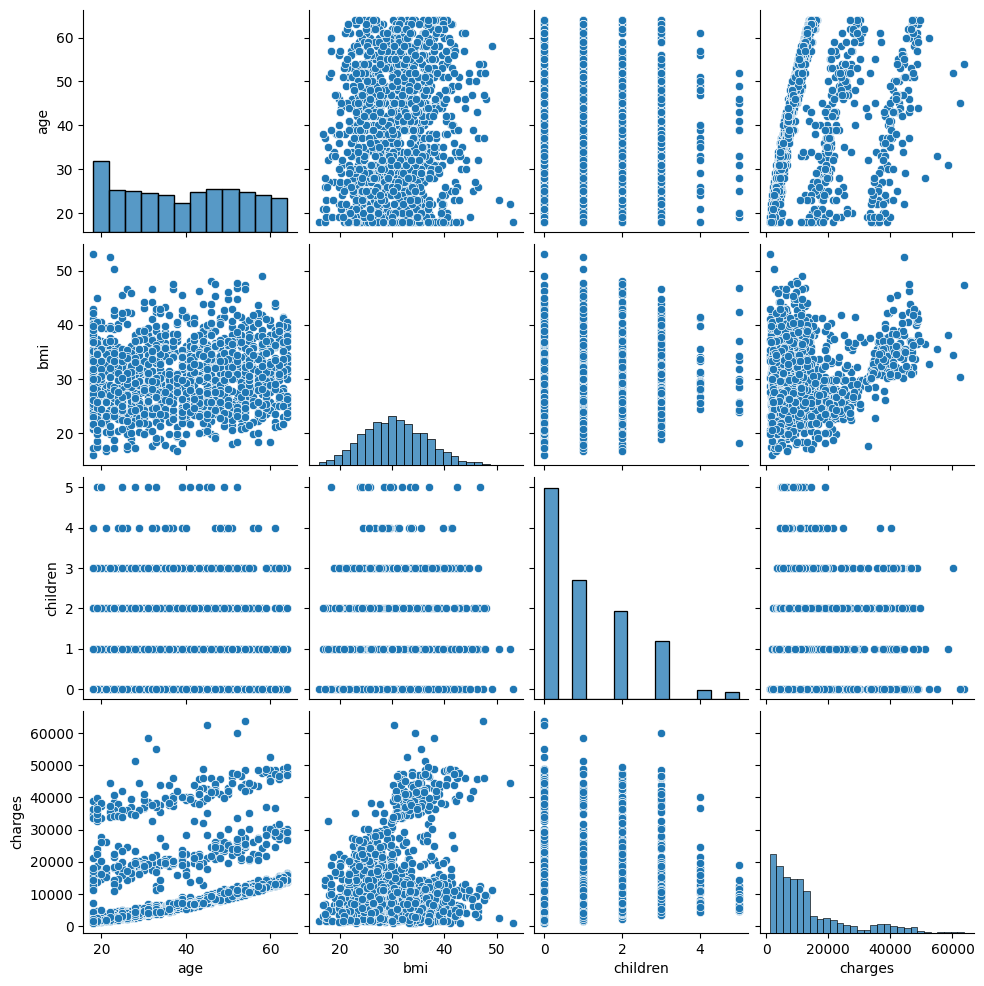

In [69]:
# Gráficos de dispersão em grade entre todas as variáveis
sns.pairplot(df)

<Axes: >

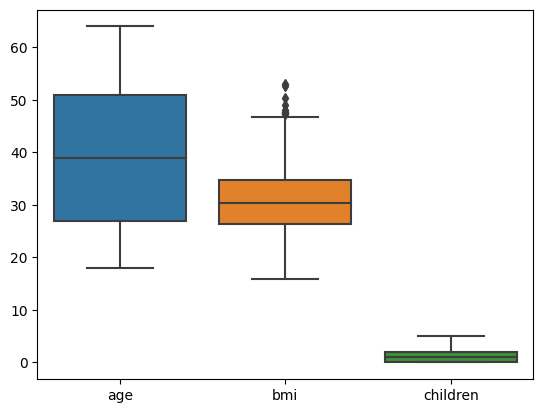

In [70]:
# Verificando outliers nas variáveis numéricas, com excessão da variável alvo
sns.boxplot(df.drop('charges',axis=1,inplace=False))

# >>> Existem algums valores outliers na variável 'bmi'

<Axes: xlabel='sex', ylabel='count'>

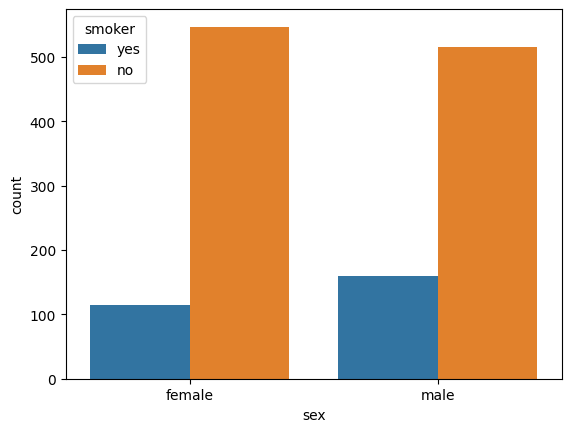

In [71]:
# Análise da distribuição de fumantes em relação ao sexo

sns.countplot(df,x='sex',hue='smoker')

<Axes: >

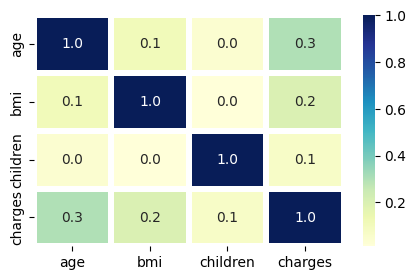

In [72]:
# Correlação entre as variáveis
plt.figure(figsize=(5, 3))
sns.heatmap(df.corr(),annot=True, linewidths=3,cmap='YlGnBu',fmt=".1f")

# >>> Sem altas correlações

#3) Pré-processamento

In [73]:
#  Divisão de X e y
X=df.drop('charges',axis=1)
y=df['charges']

# Split em dados de treino e teste (antes de qualquer manipulação)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Criando cópia dos dados, para outro tipo de encoder futuro
X_train2=X_train.copy()
X_test2=X_test.copy()

# >>> Como se trata de um um problema de regressão, não será verificado o balanceamento
# da variável alvo do dataset ('charge')

In [74]:
# Codificando as variáveis categóricas em numéricas com CastBoostEncoder

# Instanciando e informando as colunas
encoder = CatBoostEncoder(cols=['sex','smoker','region'])

# Treinando o encoder nos dados de treino e aplicando a transformação
X_train=encoder.fit_transform(X_train,y_train)  #fit.transform

# Aplicando somente transformação nos dados de teste
X_test =encoder.transform(X_test) #somente "transform"

# ==========================================================================================

# Codificando as variáveis categóricas em numéricas com OneHotEncoder

# sex     = 2 classes
# smoker  = 2 classes
# region  = 4 classes

# Instanciando o encoder
encoder2 = OneHotEncoder()

# Colunas a serem convertidas
columns_enc = ['sex','smoker','region']

# Treinando o encoder nos dados de treino e aplicando a transformação
X_train_encoded = encoder2.fit_transform(X_train2[columns_enc]) #fit_transform
X_train_encoded_df = pd.DataFrame(X_train_encoded.toarray(), columns=encoder2.get_feature_names_out(columns_enc))

# Aplicando somente transformação nos dados de teste
X_test_encoded = encoder2.transform(X_test2[columns_enc]) #somente 'transform'
X_test_encoded_df = pd.DataFrame(X_test_encoded.toarray(), columns=encoder2.get_feature_names_out(columns_enc))

# Concatenar as colunas codificadas de volta aos dados de treino originais
X_train2=X_train.reset_index()
X_train2 = pd.concat([X_train2.drop(columns=columns_enc), X_train_encoded_df], axis=1)
X_train2=X_train2.drop('index',axis=1)

# Concatenar as colunas codificadas de volta aos dados de teste originais
X_test2=X_test2.reset_index()
X_test2 = pd.concat([X_test2.drop(columns=columns_enc), X_test_encoded_df], axis=1)
X_test2=X_test2.drop('index',axis=1)

# Nota: antes de concatenar o dataframe de X_train e X_encoded é necessário resetar o Index de X_train,
# pois como os valores deste são definidos aleatoriamente no split, e os valores dos index do X_encoded são resetados,
# os index não vão casar entre os dataframes, sendo que os valores comuns de index serão concatenados erroneamente, e os valores não
# existentes no index serão adicionados, criando várias novas instâncias e gerando valores 'NaN'

In [75]:
# Verificando as transformações
X_train.sample(5)

,age,sex,bmi,children,smoker,region
205,28,12332.241643,28.88,1,8517.160933,12937.510145
798,58,12308.644087,33.10,0,8596.128969,12333.554392
1105,54,12336.309623,31.24,0,8514.906266,14725.142055
285,46,13120.395486,26.62,1,9139.559060,19622.133694
1206,59,12346.809069,34.80,2,8585.219051,12243.542886


In [76]:
# Verificando as transformações
X_train2.sample(5)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
137,47,36.19,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
744,22,32.11,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
127,20,39.40,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
925,46,33.44,1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
403,54,29.20,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [77]:
# Padronizando e normalizando os dados - Codificação CatBoostEncoder

# Instanciando os scalers
std_scaler=StandardScaler()
norm_scaler=MinMaxScaler()

# Treinando o scaler e aplicando a transformação nos dados de treino
X_train_std = std_scaler.fit_transform(X_train)     #fit_transform
X_train_norm = norm_scaler.fit_transform(X_train)

# Aplicando somente transformação nos dados de teste
X_test_std = std_scaler.transform(X_test)     #somente 'transform'
X_test_norm = norm_scaler.transform(X_test)

# ========================================================================
# Padronizando e normalizando os dados - Codificação OneHotEncoder

# Instanciando os scalers
std_scaler2=StandardScaler()
norm_scaler2=MinMaxScaler()

# Treinando o scaler e aplicando a transformação nos dados de treino
X_train2_std = std_scaler2.fit_transform(X_train)     #fit_transform
X_train2_norm = norm_scaler2.fit_transform(X_train)

# Aplicando somente transformação nos dados de teste
X_test2_std = std_scaler2.transform(X_test)     #somente 'transform'
X_test2_norm = norm_scaler2.transform(X_test)


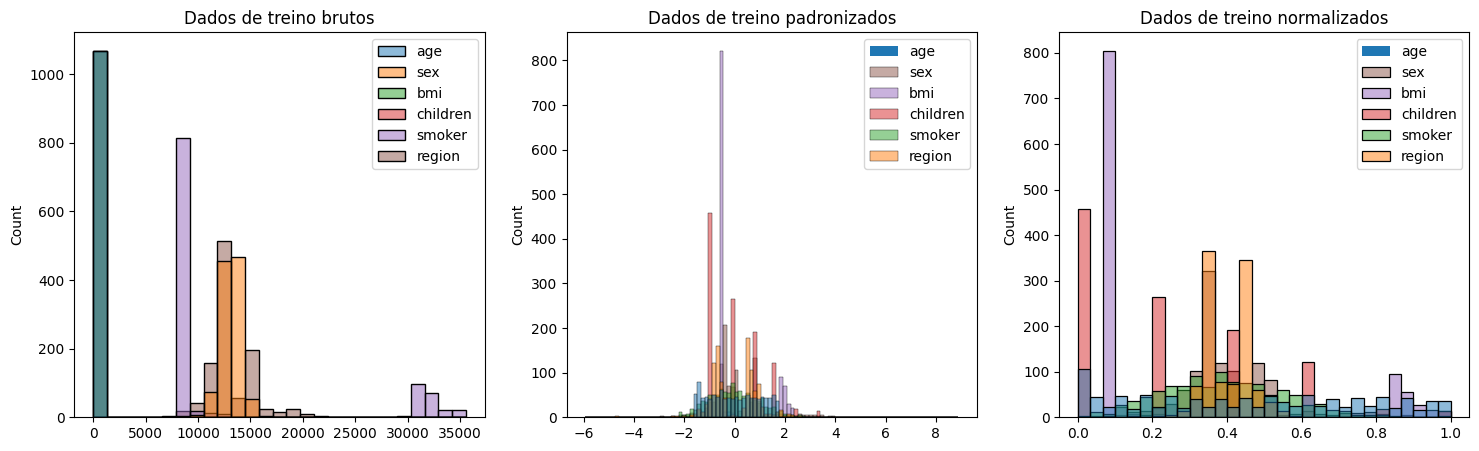

In [78]:
# Verificando a padronização/normalização nas variáveis numéricas
# (somente dos dados codificados com CatBoostEncoder)

fig, axs = plt.subplots(1, 3,figsize=(18, 5))

sns.histplot(X_train, ax=axs[0])
axs[0].set_title("Dados de treino brutos")

sns.histplot(X_train_std, ax=axs[1])
axs[1].set_title("Dados de treino padronizados")
names_cols=list(X_train.columns)
axs[1].legend(labels=names_cols)

sns.histplot(X_train_norm, ax=axs[2])
axs[2].set_title("Dados de treino normalizados")
names_cols=list(X_train.columns)
axs[2].legend(labels=names_cols)

Observar redução nas escalas:

* Escala original: de 0 a 35000
* Escala padronizada: de -6 a 8
* Escala normalizada: de 0 a 1
<br><br>

#4) Máquina preditiva

In [79]:
# Criando um dicionário auxiliar para criação de dataframe resumo (usado apenas no final do projeto)
resumo={'Modelo':[],'Trat. dos dados':[],'RMSE':[],'R2':[]}

# Instanciando as métricas
rmse_cv=make_scorer(mean_squared_error)
r2_cv=make_scorer(r2_score)

##4.1) Regressão Linear

In [80]:
# Modelos Baseline com Validação Cruzada - Codificação CatBoostEncoder

# Instanciando o modelo
lr=LinearRegression()

# Validação cruzada com dados padronizados
mse=cross_val_score(lr,X_train_std,y_train,cv=5,scoring=rmse_cv).mean()
r2=cross_val_score(lr,X_train_std,y_train,cv=5,scoring=r2_cv).mean()

resumo['Modelo'].append('Linear Regression')
resumo['Trat. dos dados'].append('padronização - CatBoost')
resumo['RMSE'].append(np.sqrt(mse))
resumo['R2'].append(r2)


# Validação cruzada com dados normalizados
mse=cross_val_score(lr,X_train_norm,y_train,cv=5,scoring=rmse_cv).mean()
r2=cross_val_score(lr,X_train_norm,y_train,cv=5,scoring=r2_cv).mean()

resumo['Modelo'].append('Linear Regression')
resumo['Trat. dos dados'].append('normalização - CatBoost')
resumo['RMSE'].append(np.sqrt(mse))
resumo['R2'].append(r2)


# =========================================================================
# Modelos Baseline com Validação Cruzada - Codificação OneHotEncoder

# Instanciando o modelo
lr2=LinearRegression()

# Validação cruzada com dados padronizados
mse=cross_val_score(lr2,X_train2_std,y_train,cv=5,scoring=rmse_cv).mean()
r2=cross_val_score(lr2,X_train2_std,y_train,cv=5,scoring=r2_cv).mean()

resumo['Modelo'].append('Linear Regression')
resumo['Trat. dos dados'].append('padronização - OneHot')
resumo['RMSE'].append(np.sqrt(mse))
resumo['R2'].append(r2)


# Validação cruzada com dados normalizados
mse=cross_val_score(lr2,X_train2_norm,y_train,cv=5,scoring=rmse_cv).mean()
r2=cross_val_score(lr2,X_train2_norm,y_train,cv=5,scoring=r2_cv).mean()

resumo['Modelo'].append('Linear Regression')
resumo['Trat. dos dados'].append('normalização - OneHot')
resumo['RMSE'].append(np.sqrt(mse))
resumo['R2'].append(r2)

##4.2) XGboost

In [81]:
# Modelo Baseline com Validação Cruzada - Codificação CatBoostEncoder

# Instanciando o modelo
xgb=XGBRegressor()

# Validação cruzada com dados brutos
mse=cross_val_score(xgb,X_train,y_train,cv=5,scoring=rmse_cv).mean()
r2=cross_val_score(xgb,X_train,y_train,cv=5,scoring=r2_cv).mean()

resumo['Modelo'].append('XGBoost')
resumo['Trat. dos dados'].append('CatBoost')
resumo['RMSE'].append(np.sqrt(mse))
resumo['R2'].append(r2)

# ==========================================================================
# Modelo Baseline com Validação Cruzada - Codificação CatBoostEncoder

# Instanciando o modelo
xgb2=XGBRegressor()

# Validação cruzada com dados brutos
mse=cross_val_score(xgb2,X_train2,y_train,cv=5,scoring=rmse_cv).mean()
r2=cross_val_score(xgb2,X_train2,y_train,cv=5,scoring=r2_cv).mean()

resumo['Modelo'].append('XGBoost')
resumo['Trat. dos dados'].append('OneHot')
resumo['RMSE'].append(np.sqrt(mse))
resumo['R2'].append(r2)

##4.3) Random Forest

In [82]:
# Modelo Baseline com Validação Cruzada - Codificação CatBoostEncoder

# Instanciando o modelo
rf=RandomForestRegressor()

# Validação cruzada com dados brutos
mse=cross_val_score(rf,X_train,y_train,cv=5,scoring=rmse_cv).mean()
r2=cross_val_score(rf,X_train,y_train,cv=5,scoring=r2_cv).mean()

resumo['Modelo'].append('Random Forest')
resumo['Trat. dos dados'].append('CatBoost')
resumo['RMSE'].append(np.sqrt(mse))
resumo['R2'].append(r2)


# ===========================================================================
# Modelo Baseline com Validação Cruzada - Codificação OneHotEncoder

# Instanciando o modelo
rf2=RandomForestRegressor()

# Validação cruzada com dados brutos
mse=cross_val_score(rf2,X_train2,y_train,cv=5,scoring=rmse_cv).mean()
r2=cross_val_score(rf2,X_train2,y_train,cv=5,scoring=r2_cv).mean()

resumo['Modelo'].append('Random Forest')
resumo['Trat. dos dados'].append('OneHot')
resumo['RMSE'].append(np.sqrt(mse))
resumo['R2'].append(r2)


##4.4) Avaliação baseline

In [83]:
#  Quadro resumo

#Cria o dataframe
qd_resumo=pd.DataFrame(resumo)

# Ajustes no dataframe
qd_resumo[['RMSE','R2']]=qd_resumo[['RMSE','R2']].apply(lambda x: round(x,2)) #Arredonda
qd_resumo.rename(columns={'RMSE':'RMSE (AU$)'},inplace=True)                  #Altera o nome da coluna


qd_aux=qd_resumo.copy()
# definir estilo com bordas no índice e todas as células
qd_resumo = qd_resumo.style.set_table_styles([{'selector': 'th','props': [('border', '2px solid black')]}])
qd_resumo = qd_resumo.set_properties(**{'border': '2px solid black'})


# Cria um mapa de cores personalizado em degradê
from matplotlib.colors import LinearSegmentedColormap
cmap1 = LinearSegmentedColormap.from_list('my_cmap', ['green', 'red'])
cmap2 = LinearSegmentedColormap.from_list('my_cmap', ['red', 'green'])

# definir estilo com barras de cores
qd_resumo = qd_resumo.bar(subset=['RMSE (AU$)'], cmap=cmap1,vmin=qd_aux['RMSE (AU$)'].min()*0.97,vmax=qd_aux['RMSE (AU$)'].max()*1.03)
qd_resumo = qd_resumo.bar(subset=['R2'], cmap=cmap2,vmin=qd_aux['R2'].min()*0.97,vmax=qd_aux['R2'].max()*1.03)


qd_resumo

,Modelo,Trat. dos dados,RMSE (AU$),R2
0,Linear Regression,padronização - CatBoost,6214.300000,0.720000
1,Linear Regression,normalização - CatBoost,6214.300000,0.720000
2,Linear Regression,padronização - OneHot,6214.300000,0.720000
3,Linear Regression,normalização - OneHot,6214.300000,0.720000
4,XGBoost,CatBoost,5641.560000,0.770000
5,XGBoost,OneHot,5276.290000,0.800000
6,Random Forest,CatBoost,5357.150000,0.800000
7,Random Forest,OneHot,4940.640000,0.820000


O modelo Random Forest é o mais promissor.

Assim, será o escolhido para tunagem de hiperparâmetros e testagem.
<br><br>

##4.5) Modelo final

In [84]:
# Criando novo dicionário resumo

teste_rf={'Encoder':[],'Dados':[],'Tempo execução':[],'RMSE (AU$)':[],'R2':[],'Hiperparâmetros':[]}

In [85]:
# Modelo com otimização de hiperparâmetros - codificação CatBoostEncoder

# Grid de hiperparâmetros
grid_rf = {
            'n_estimators': [100, 500, 1000],
            'max_depth': [None, 5, 10],
          }

# Aplicando a busca dos hiperparâmetros ótimos
rf_opt = GridSearchCV(estimator=rf, param_grid=grid_rf, cv=5)
rf_opt.fit(X_train, y_train)        #dados sem padronização

# Extração dos melhores hiperparâmetros
best_rf=rf_opt.best_params_

# Validação cruzada com dados melhores hiperparâmetros
start=time.time() #início contador de tempo
mse=cross_val_score(rf_opt,X_train,y_train,cv=5,scoring=rmse_cv).mean()
r2=cross_val_score(rf_opt,X_train,y_train,cv=5,scoring=r2_cv).mean()
end=time.time()   #fim contador de tempo
tot_time = end-start

teste_rf['Encoder'].append('CatBoost')
teste_rf['Dados'].append('treino - CV')
teste_rf['Tempo execução'].append(str(round(tot_time/60,1))+' min')
teste_rf['RMSE (AU$)'].append(np.sqrt(mse))
teste_rf['R2'].append(r2)
teste_rf['Hiperparâmetros'].append(best_rf)

# =================================================================================================================
# Modelo com otimização de hiperparâmetros - codificação OneHotEncoder

# Grid de hiperparâmetros
grid_rf = {
            'n_estimators': [100, 500, 1000],
            'max_depth': [None, 5, 10],
          }

# Aplicando a busca dos hiperparâmetros ótimos
rf_opt2 = GridSearchCV(estimator=rf2, param_grid=grid_rf, cv=5)
rf_opt2.fit(X_train2, y_train)        #dados sem padronização

# Extração dos melhores hiperparâmetros
best_rf2=rf_opt2.best_params_

# Validação cruzada com dados melhores hiperparâmetros
start=time.time() #início contador de tempo
mse=cross_val_score(rf_opt2,X_train2,y_train,cv=5,scoring=rmse_cv).mean()
r2=cross_val_score(rf_opt2,X_train2,y_train,cv=5,scoring=r2_cv).mean()
end=time.time()   #fim contador de tempo
tot_time = end-start

teste_rf['Encoder'].append('OneHot')
teste_rf['Dados'].append('treino - CV')
teste_rf['Tempo execução'].append(str(round(tot_time/60,1))+' min')
teste_rf['RMSE (AU$)'].append(np.sqrt(mse))
teste_rf['R2'].append(r2)
teste_rf['Hiperparâmetros'].append(best_rf2)

In [86]:
# Verificando o modelo em dados de teste - Codificação CatBoost

y_pred_rf_opt=rf_opt.predict(X_test)

teste_rf['Encoder'].append('CatBoost')
teste_rf['Dados'].append('teste')
teste_rf['Tempo execução'].append('mínimo')
teste_rf['RMSE (AU$)'].append(np.sqrt(mean_squared_error(y_pred_rf_opt,y_test)))
teste_rf['R2'].append(r2_score(y_pred_rf_opt,y_test))
teste_rf['Hiperparâmetros'].append(best_rf)

# ========================================================================
# Verificando o modelo em dados de teste - Codificação OneHotEncoder

y_pred_rf_opt2=rf_opt2.predict(X_test2)

teste_rf['Encoder'].append('OneHot')
teste_rf['Dados'].append('teste')
teste_rf['Tempo execução'].append('mínimo')
teste_rf['RMSE (AU$)'].append(np.sqrt(mean_squared_error(y_pred_rf_opt2,y_test)))
teste_rf['R2'].append(r2_score(y_pred_rf_opt2,y_test))
teste_rf['Hiperparâmetros'].append(best_rf2)

#5) Conclusão

In [87]:
#  Quadro resumo

#Cria o dataframe
qd_rf=pd.DataFrame(teste_rf)

# Ajustes no dataframe
qd_rf[['RMSE (AU$)','R2']]=qd_rf[['RMSE (AU$)','R2']].apply(lambda x: round(x,2)) #Arredonda

qd_aux=qd_rf.copy()

# definir estilo com bordas no índice e todas as células
qd_rf = qd_rf.style.set_table_styles([{'selector': 'th','props': [('border', '2px solid black')]}])
qd_rf = qd_rf.set_properties(**{'border': '2px solid black'})

# Cria um mapa de cores personalizado em degradê
from matplotlib.colors import LinearSegmentedColormap
cmap1 = LinearSegmentedColormap.from_list('my_cmap', ['green', 'red'])
cmap2 = LinearSegmentedColormap.from_list('my_cmap', ['red', 'green'])

# definir estilo com barras de cores
qd_rf = qd_rf.bar(subset=['RMSE (AU$)'], cmap=cmap1,vmin=qd_aux['RMSE (AU$)'].min()*0.97,vmax=qd_aux['RMSE (AU$)'].max()*1.03)
qd_rf = qd_rf.bar(subset=['R2'], cmap=cmap2,vmin=qd_aux['R2'].min()*0.97,vmax=qd_aux['R2'].max()*1.03)

print('\nDesempenho do modelo Random Forest em dados codificados por CatBoostEncoder e por OneHotEncoder\n')

qd_rf


Desempenho do modelo Random Forest em dados codificados por CatBoostEncoder e por OneHotEncoder



,Encoder,Dados,Tempo execução,RMSE (AU$),R2,Hiperparâmetros
0,CatBoost,treino - CV,15.3 min,4972.510000,0.820000,"{'max_depth': 5, 'n_estimators': 500}"
1,OneHot,treino - CV,11.5 min,4648.470000,0.840000,"{'max_depth': 5, 'n_estimators': 100}"
2,CatBoost,teste,mínimo,4616.910000,0.860000,"{'max_depth': 5, 'n_estimators': 500}"
3,OneHot,teste,mínimo,4301.440000,0.880000,"{'max_depth': 5, 'n_estimators': 100}"


Em resumo, o modelo Random Forest com a codificação OneHotEncoder se sobressaiu em realação ao com codificação CatBoost.

Portanto, este modelo pode ser treinado com todo o conjunto de dados disponível, e testado em mais dados inéditos, antes de ser colocado em produção.
<br><br>
Uma observação importante é a de que nem sempre esse padrão de desempenho vai ser mantido. Haverá casos em que o modelo com CatBoost, ou até mesmo com outros codificadores, terão desempenho melhores nos algoritmos baseados em árvores.
<br><br>